# Sentiment analysis

### Some plotting functions

In [3]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random

In [336]:
# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = 25,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    plt.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = 25,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    plt.xlabel('aack')
    plt.ylabel('beep')
    plt.legend(['happy','sad'])
def draw_line(a,b,c, color='black', linewidth=2.0, linestyle='solid', starting=0, ending=3):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, -c/b - a*x/b, linestyle=linestyle, color=color, linewidth=linewidth)

In [316]:
import pandas as pd
X = pd.DataFrame([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[3,2],[2,3]])
y = pd.Series([0,0,0,0,1,1,1,1])

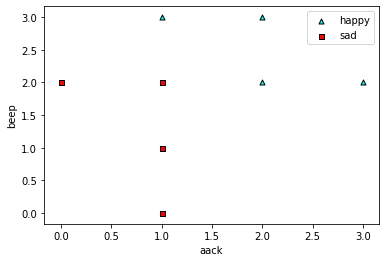

In [317]:
# Plotting the points
plot_points(X, y)

# Uncomment the following line to see a good line fit for this data.
#draw_line(1,1,-3.5)

### The Perceptron Algorithm

In [313]:
def score(weights, bias, features):
    return features.dot(weights) + bias

def prediction(weights, bias, features):
    return int(score(weights, bias, features) >= 0)

def error(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    if pred == label:
        return 0
    else:
        return np.abs(score(weights, bias, features))

def total_error(weights, bias, X, y):
    total_error = 0
    for i in range(len(X)):
        total_error += error(weights, bias, X.loc[i], y[i])
    return total_error

In [314]:
weights = [1,1]
bias = -3.5
for i in range(len(features)):
    print(prediction(weights, bias, features.loc[i]), error(weights, bias, features.loc[i], labels[i]))

0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0


In [315]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    if pred == label:
        return weights, bias
    else:
        if label==1 and pred==0:
            for i in range(len(weights)):
                weights[i] += features[i]*learning_rate
            bias += learning_rate
        elif label==0 and pred==1:
            for i in range(len(weights)):
                weights[i] -= features[i]*learning_rate
            bias -= learning_rate
    return weights, bias

def perceptron_trick_clever(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
        bias += (label-pred)*learning_rate
    return weights, bias

In [295]:
perceptron_trick_clever(weights, bias, features.loc[6], 0)

([0.97, 0.98], -3.5199999999999996)

In [338]:
random.seed(0)
def perceptron_algorithm(X, y, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(X.loc[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        # Uncomment the following line to draw all the intermediate classifiers
        draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
        errors.append(total_error(weights, bias, X, y))
        j = random.randint(0, len(features)-1)
        weights, bias = perceptron_trick(weights, bias, X.loc[j], y[j])
    draw_line(weights[0], weights[1], bias)
    plot_points(X, y)
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

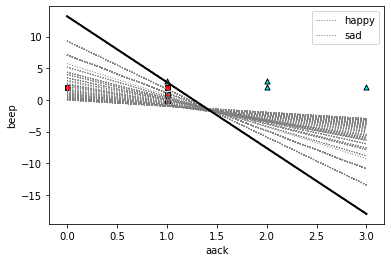

([0.5199999999999996, 0.049999999999999364], -0.6600000000000004)

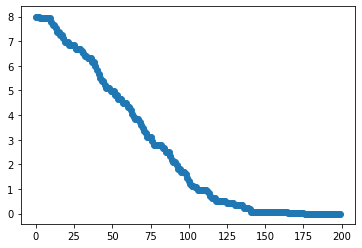

In [339]:
perceptron_algorithm(X, y)

### Logistic regression

In [344]:
def sigmoid(x):
    return np.exp(x)/(1+np.exp(x))

def soft_relu(x):
    return np.log(1+np.exp(x))

def lr_prediction(weights, bias, features):
    return sigmoid(score(weights, bias, features))

def lr_error(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    return soft_relu((pred-label)*score(weights, bias, features))

def total_lr_error(weights, bias, X, y):
    total_error = 0
    for i in range(len(X)):
        total_error += lr_error(weights, bias, X.loc[i], y[i])
    return total_error

In [345]:
def lr_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = lr_prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
        bias += (label-pred)*learning_rate
    return weights, bias

In [346]:
def lr_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features.loc[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
        errors.append(total_error(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = perceptron_trick(weights, bias, features.loc[j], labels[j])
    draw_line(weights[0], weights[1], bias)
    plot_points(features, labels)
    plt.show()
    plt.scatter(range(epochs), errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    return weights, bias

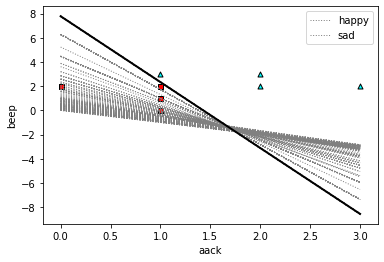

([0.48999999999999955, 0.08999999999999939], -0.7000000000000004)

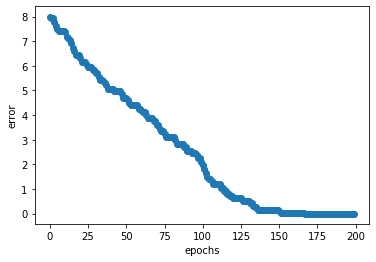

In [347]:
lr_algorithm(features, labels)

In [342]:
sigmoid(-1)

0.2689414213699951

In [343]:
sigmoid(1)

0.7310585786300049